##### 設定 Colab 開發環境
開發 LINE 機器人時，可以使用 Google Colab 作為線上開發與測試的工具，不過受限於 Colab 是無主機的開發環境，\
只要閒置過久或重新啟動 Colab，都需要重新安裝 ngrok 和 line-bot-sdk 兩個外部函式庫，這篇教學將會介紹完整的安裝過程，\
每次重新開始時只要按照步驟，就可以再次建立完整的開發測試環境。

##### 第一步、連動 Google Drive 
開啟一個 Colab 筆記本 ( 參考：使用 Google Colab )，點擊左側「檔案」，點擊「掛接雲端硬碟」。

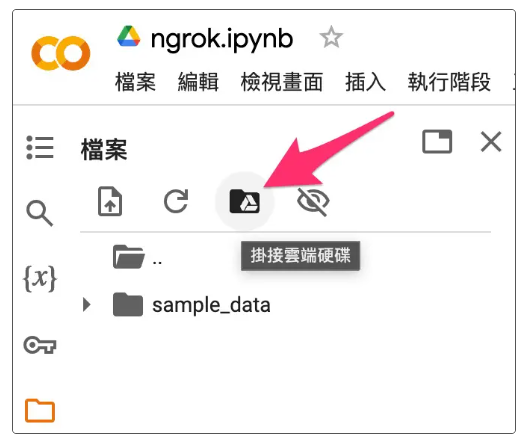

點擊「連線至 Google 雲端硬碟」。

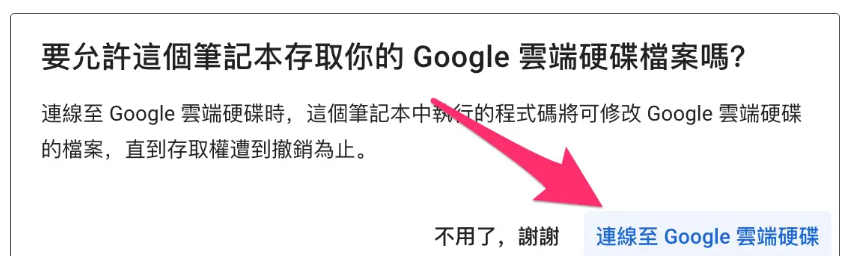

掛接後，輸入下方程式碼，將這個 Colab 筆記本串接 Google 雲端硬碟。

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

!mkdir -p /drive
#umount /drive
!mount --bind /content/drive/My\ Drive /drive
!mkdir -p /drive/ngrok-ssh
!mkdir -p ~/.ssh

執行後會跳出確認視窗，點擊「連線至 Google 雲端硬碟」。

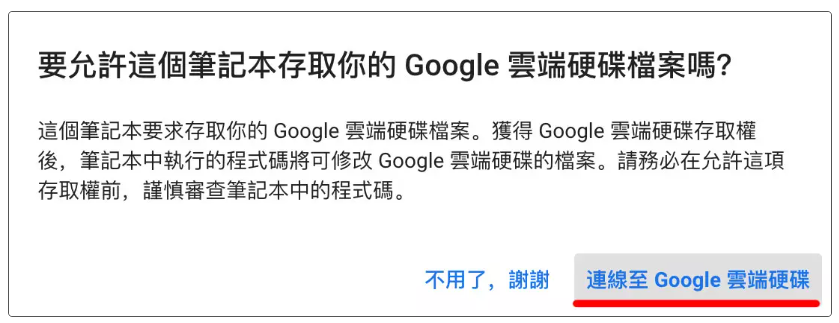

選擇自己的 Google 帳號。

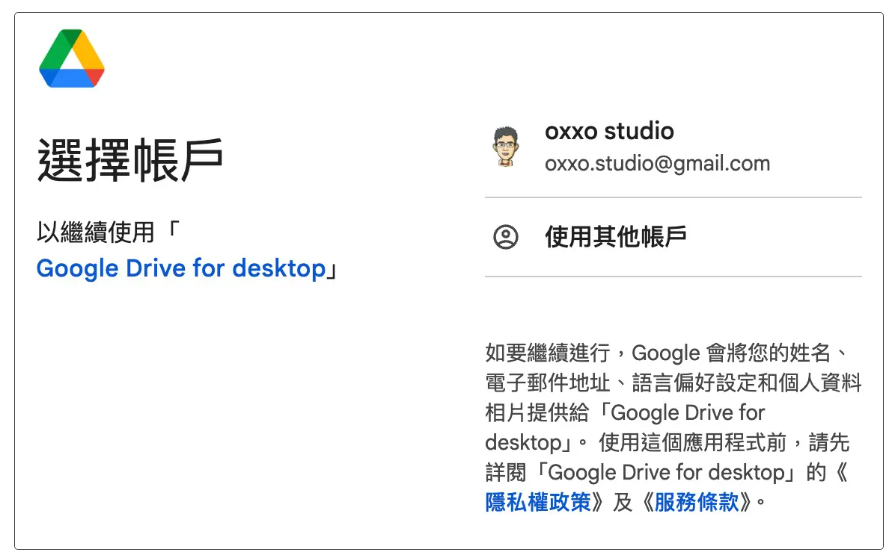

設定要讓 Colab 可以存取的權限，設定後點擊「繼續」。

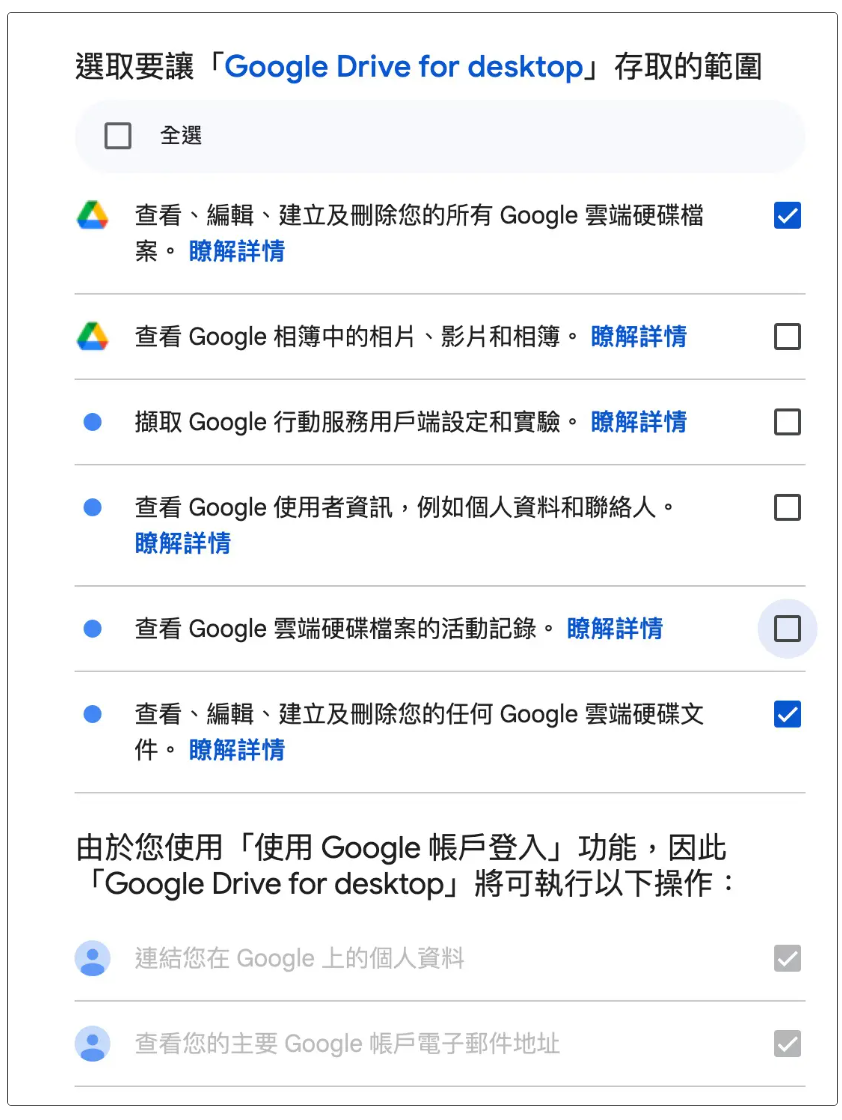

完成後，在 Colab 會出現 Mounted at /content/drive 的文字，表示已經成功串接 Google 雲端硬碟。

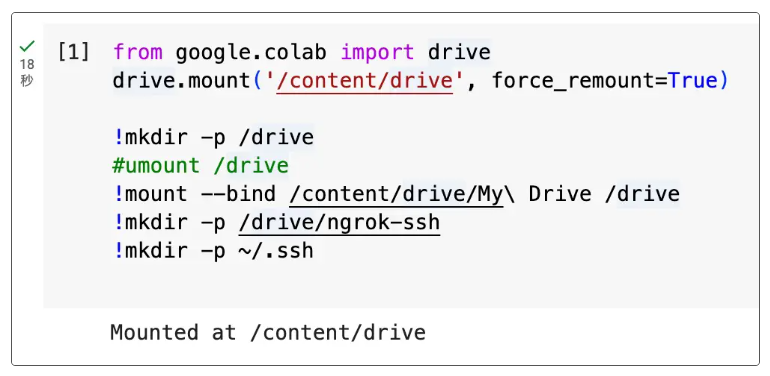

##### 第二步、安裝與認證 ngrok 
輸入下方的程式碼，將 ngrok 安裝到 Google 雲端硬碟中。

In [ ]:
!mkdir -p /drive/ngrok-ssh
%cd /drive/ngrok-ssh
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip -O ngrok-stable-linux-amd64.zip
!unzip -u ngrok-stable-linux-amd64.zip
!cp /drive/ngrok-ssh/ngrok /ngrok
!chmod +x /ngrok

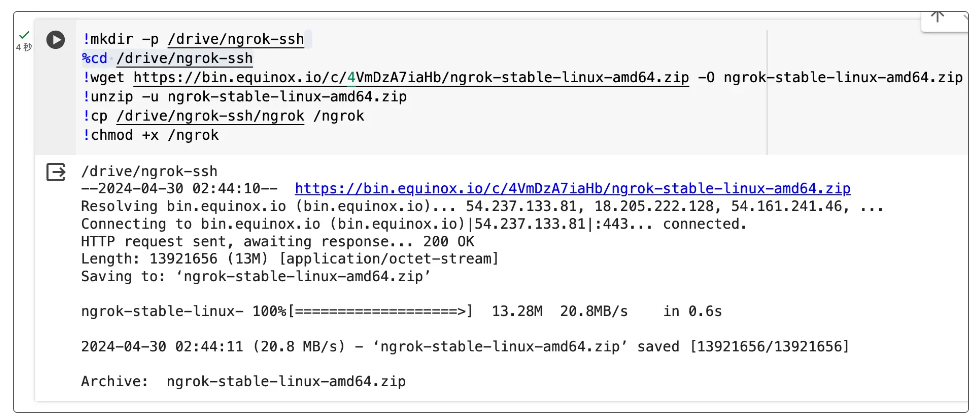

安裝完成後，就能使用 ngrok 指令輸入 token。

* !/ngrok authtoken <token>

使用 pip 安裝 pyngrok 函式庫。

* !pip install pyngrok

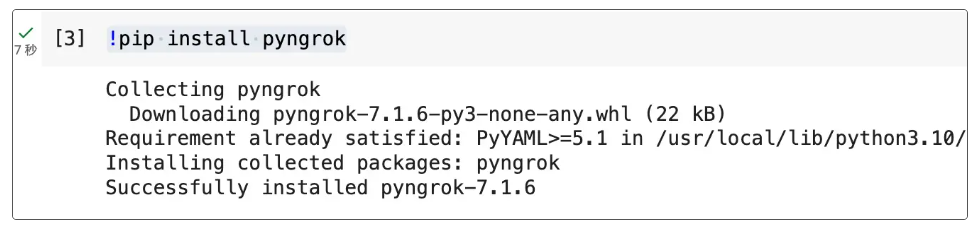

輸入並執行下方的程式碼，輸入 ngrok token 之後，就會與 ngrok 進行認證。

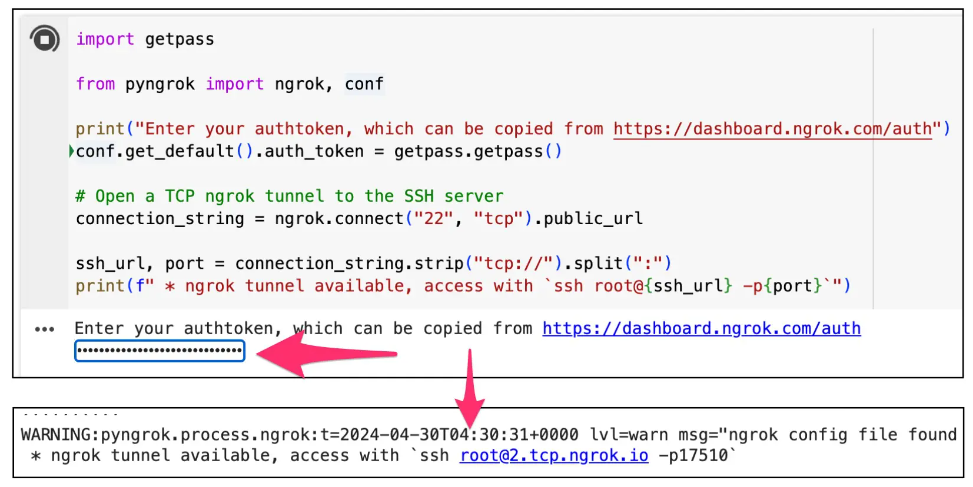

In [ ]:
import getpass

from pyngrok import ngrok, conf

print("Enter your authtoken, which can be copied from https://dashboard.ngrok.com/auth")
conf.get_default().auth_token = getpass.getpass()

# Open a TCP ngrok tunnel to the SSH server
connection_string = ngrok.connect("22", "tcp").public_url

ssh_url, port = connection_string.strip("tcp://").split(":")
print(f" * ngrok tunnel available, access with `ssh root@{ssh_url} -p{port}`")

#### 第三步、安裝 line-bot-sdk 函式庫 
輸入下方程式碼，安裝 line-bot-sdk 函式庫。

這個步驟完成後，就可以前往「使用 ngrok + Colab 建立 Webhook」，按照步驟建立串接 LINE 的 Webhook。

* !pip install line-bot-sdk

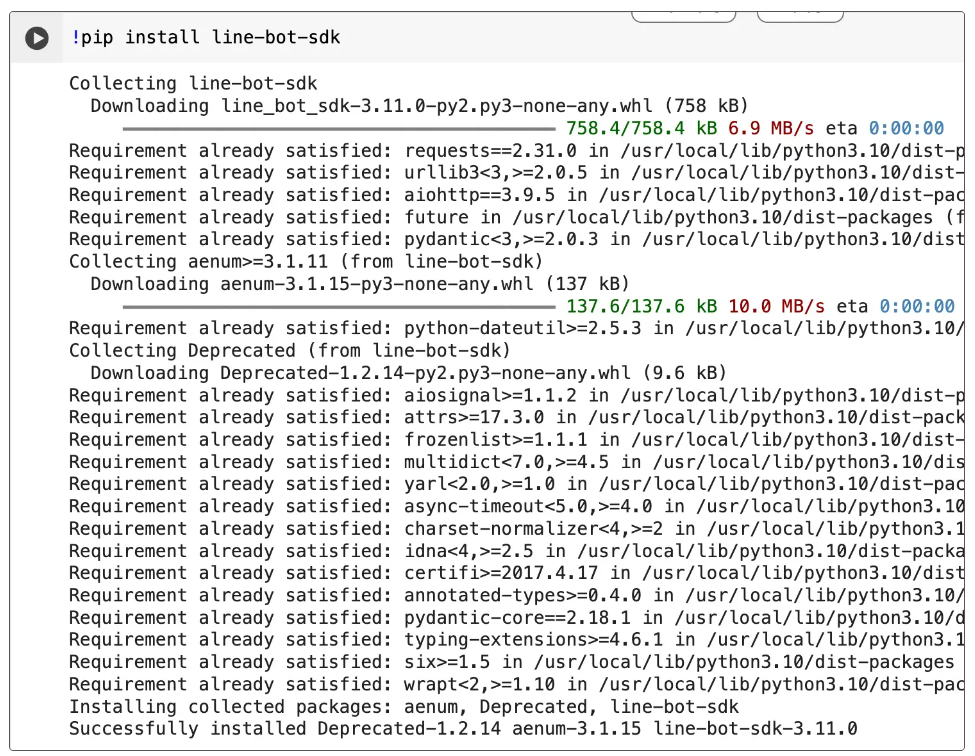

##### 小結 
除了每隔一段時間使用 Colab 就要重新執行上述步驟稍嫌麻煩外，因為完全不需要在本機環境安裝任何東西，還可以跨平台進行開發，\
使用 Colab 搭配 ngrok 真的是相當方便的開發方式！